# Descriptive Statistics

In [12]:
#!pip install scipy

In [13]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# when using notebooks
%matplotlib inline

df = pd.read_csv('data/penguins_simple.csv', sep=";")
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE


In [14]:
df.shape

(333, 6)

In [15]:
df.columns

Index(['Species', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Sex'],
      dtype='object')

In [16]:
# for simplicity we are going to use forward fill here but 
# we will discuss different strategies of how to deal with
# missing values later on

df = df.fillna(method='ffill')

In [17]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE


---

#### Type of variables

species: Categorical

island: Categorical

bill_length_mm: Metric

bill_length_mm: Metric

flipper_length_mm: Metric

body_mass_g: Metric

sex: Categorical

---

In [18]:
## arithmetic mean
mean = df.mean()
mean

C:\Users\Master\AppData\Local\Temp/ipykernel_7568/2152524925.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df.mean()


Culmen Length (mm)       43.992793
Culmen Depth (mm)        17.164865
Flipper Length (mm)     200.966967
Body Mass (g)          4207.057057
dtype: float64

In [19]:
## median
median = df.median()
median

C:\Users\Master\AppData\Local\Temp/ipykernel_7568/2109127600.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = df.median()


Culmen Length (mm)       44.5
Culmen Depth (mm)        17.3
Flipper Length (mm)     197.0
Body Mass (g)          4050.0
dtype: float64

In [20]:
df.max(numeric_only=True)

Culmen Length (mm)       59.6
Culmen Depth (mm)        21.5
Flipper Length (mm)     231.0
Body Mass (g)          6300.0
dtype: float64

In [21]:
## mode
df.mode(numeric_only=False)

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,41.1,17.0,190.0,3800.0,MALE


In [22]:
## Standard Deviation
df['bill_depth_mm'].std()

KeyError: 'bill_depth_mm'

In [ ]:
np.sqrt(df['bill_depth_mm'].var())

1.9783418641100063

In [ ]:
## Range
df['bill_depth_mm'].max() - df['bill_depth_mm'].min()

8.4

In [ ]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
## IQR
df['bill_depth_mm'].quantile(0.75) - df['bill_depth_mm'].quantile(0.25)

3.125

In [ ]:
stats.iqr(df['bill_depth_mm'], rng=(25, 75))

3.125

<AxesSubplot:>

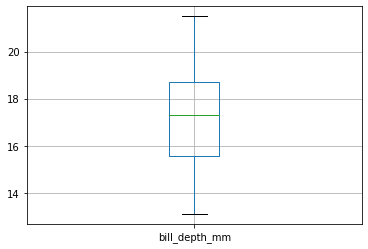

In [ ]:
## Boxplot
df.boxplot('bill_depth_mm')

### Distributions 

#### Univariate distributions

Frequency table: `.value_counts()`

Histogram: `.hist()`


#### Multivariate distributions

Categorical and Ordinal Variables: `crosstab()`

Metric Variables: `corr()`

In [ ]:
df.sex.value_counts(normalize=True)

male      0.514535
female    0.485465
Name: sex, dtype: float64

#### Look at histograms

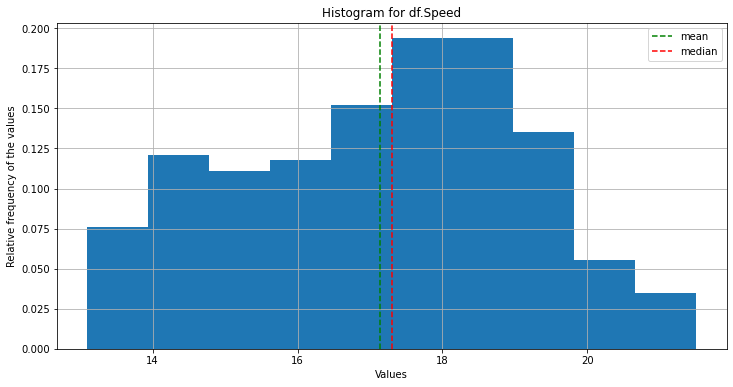

In [ ]:
df.bill_depth_mm.hist(figsize=(12,6), density=True, bins=10)
plt.title('Histogram for df.Speed')
plt.xlabel('Values')
plt.ylabel('Relative frequency of the values')
plt.axvline(df.bill_depth_mm.mean(), c='g', linestyle='--', label='mean')
plt.axvline(df.bill_depth_mm.median(), c='r', linestyle='--', label='median')
plt.legend()
plt.show()

In [ ]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [ ]:
# Crosstab
pd.crosstab(df.body_mass_g, df.flipper_length_mm, normalize='all', margins=True)

flipper_length_mm,172.0,174.0,176.0,178.0,179.0,180.0,181.0,182.0,183.0,184.0,...,222.0,223.0,224.0,225.0,226.0,228.0,229.0,230.0,231.0,All
body_mass_g,,,,,,,,,,,,,,,,,,,,,
2700.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002924
2850.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.002924,0.000000,0.000000,0.002924,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005848
2900.0,0.000000,0.000000,0.000000,0.002924,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011696
2925.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002924
2975.0,0.000000,0.000000,0.000000,0.000000,0.002924,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.002924,0.000000,0.000000,0.000000,0.000000,0.002924,0.000000,0.000000,0.005848
6000.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.002924,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005848
6050.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002924,0.000000,0.002924


In [ ]:
crosstab_data = pd.crosstab(df.body_mass_g, df.flipper_length_mm, normalize='all', margins=True)

In [ ]:
crosstab_data.max()

flipper_length_mm
172.0    0.002924
174.0    0.002924
176.0    0.002924
178.0    0.011696
179.0    0.002924
180.0    0.014620
181.0    0.020468
182.0    0.008772
183.0    0.005848
184.0    0.020468
185.0    0.026316
186.0    0.020468
187.0    0.046784
188.0    0.017544
189.0    0.020468
190.0    0.064327
191.0    0.038012
192.0    0.020468
193.0    0.043860
194.0    0.014620
195.0    0.049708
196.0    0.029240
197.0    0.029240
198.0    0.023392
199.0    0.017544
200.0    0.011696
201.0    0.017544
202.0    0.011696
203.0    0.014620
205.0    0.008772
206.0    0.002924
207.0    0.005848
208.0    0.023392
209.0    0.014620
210.0    0.040936
211.0    0.005848
212.0    0.020468
213.0    0.017544
214.0    0.017544
215.0    0.035088
216.0    0.023392
217.0    0.017544
218.0    0.014620
219.0    0.014620
220.0    0.023392
221.0    0.014620
222.0    0.017544
223.0    0.005848
224.0    0.008772
225.0    0.011696
226.0    0.002924
228.0    0.011696
229.0    0.005848
230.0    0.020468
231.0    0

In [ ]:
import seaborn as sns

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

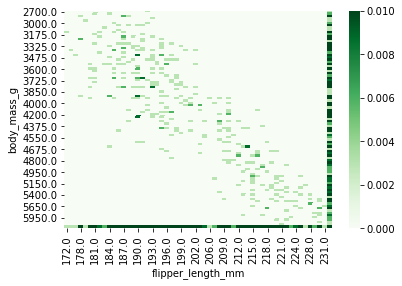

In [ ]:
sns.heatmap(crosstab_data, cmap='Greens', vmin=0, vmax=0.01)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

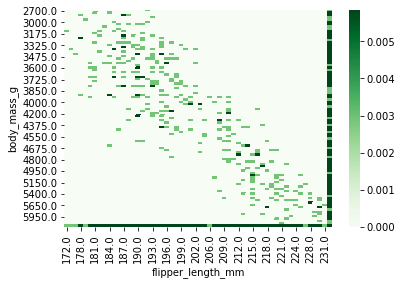

In [ ]:
sns.heatmap(crosstab_data, cmap='Greens', robust=True)

### Correlations

In [ ]:
correlations = df.corr()
correlations

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.237563,0.656864,0.596365
bill_depth_mm,-0.237563,1.000000,-0.585477,-0.474244
flipper_length_mm,0.656864,-0.585477,1.000000,0.870961
body_mass_g,0.596365,-0.474244,0.870961,1.000000


In [ ]:
import seaborn as sns

<AxesSubplot:>

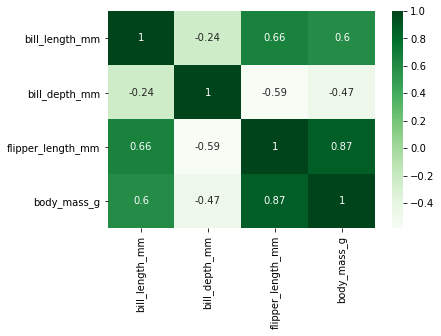

In [ ]:
sns.heatmap(correlations, annot=True, cmap='Greens')